**Anurag Sharma (*24AI91R01*)**

## **Assignment - 2**

####  **Objective** - Classify emails as spam or not spam using the [Spambase](https://archive.ics.uci.edu/static/public/94/data.csv) dataset, which contains the frequency of occurrence of 57 entities (words and characters) (in %) from 4601 spam and non-spam emails and corresponding class labels.  

Spam Classification with Logistic Regression

<font color='blue'>Task 1: Load the Spambase Dataset</font> [Marks - 1]

- Load the Spambase dataset using Pandas.
- Display the first few rows to understand the structure of the data.

<font color='blue'>Task 2: Check for Duplicate Entries and Missing Values</font> [Marks - 1]

- Check if there are duplicate entries in the dataset.
- Remove any duplicate entries.
- Check for missing values in the dataset.
- Remove entries with missing feature values.

<font color='blue'>Task 3: Preprocess the Dataset</font> [Marks - 1]

- Preprocess the dataset as required:
- Perform feature scaling or standardization on the features.

<font color='blue'>Task 4: Check Dataset Balance</font> [Marks - 1]

- Determine if the dataset is balanced or imbalanced by analyzing the distribution of the target variable.

<font color='blue'>Task 5: Split the Data</font> [Marks - 1]

- Split the data into training, validation, and test sets with the following proportions:
  - Training set: 70%
  - Validation set: 15%
  - Test set: 15%



<font color='blue'>Task 6: Implement Logistic Regression from Scratch</font> [Marks - 8]

- Implement a logistic regression model from scratch using:
  - Cross-entropy loss as the cost function.
  - Gradient descent as the learning algorithm.
  - L1 regularization in the cost function.
- Train the logistic regression model using gradient descent.
- Choose appropriate values for the learning rate and regularization parameter through cross-validation.

<font color='blue'>Task 7: Evaluate Model Performance</font> [Marks - 2]

- Evaluate the performance of your logistic regression model on the test set using:
  - Confusion matrix.
  - Precision.
  - Recall.
  - Area under the Precision-Recall Curve (AUC-PR).


<font color='blue'>Task 8: Compare with Scikit-Learn</font> [Marks - 5]

- Fit a logistic regression model using scikit-learn.
- Compare the performance of your implementation with the scikit-learn model by evaluating:
  - Confusion matrix.
  - Precision.
  - Recall.
  - Area under the Precision-Recall Curve (AUC-PR).
- Compare the AUC-PR values between your implementation and scikit-learn's implementation.

Task 1: Load the Spambase Dataset [Marks - 1]

Load the Spambase dataset using Pandas.
Display the first few rows to understand the structure of the data.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [90]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/94/data.csv") # we load the Spambase dataset using Pandas

In [91]:
df.head(10) # displaying first few rows

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [92]:
print(df.columns) # to see the columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Task 2: Check for Duplicate Entries and Missing Values [Marks - 1]

Check if there are duplicate entries in the dataset.
Remove any duplicate entries.
Check for missing values in the dataset.
Remove entries with missing feature values.

In [93]:
df.info()  # consise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [94]:
df.isnull().sum() # we check if there are any missing values

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


There are no null or missing values in the dataset

In [95]:
df.duplicated().sum()  # we check if there are duplicate entries in dataframe

391

In [96]:
df.drop_duplicates(inplace=True)  # we remove any duplicate entries

In [97]:
df.duplicated().sum()   # re-Check for missing values

0

Preprocess the Dataset [Marks - 1]

Preprocess the dataset as required:
Perform feature scaling or standardization on the features.

In [98]:
columns = df.columns
columns = columns.drop('Class')

X = df[columns].to_numpy()  # X contain all the features except the label
y = df['Class'].to_numpy()  # y contain the label

In [99]:
# print(X.shape)

In [100]:
scaler = StandardScaler()   # we perform standardization on the features
X_scaled = scaler.fit_transform(X)

Check Dataset Balance [Marks - 1]

Determine if the dataset is balanced or imbalanced by analyzing the distribution of the target variable.

In [101]:
print(df["Class"].value_counts())  # we count the number of target variable

Class
0    2531
1    1679
Name: count, dtype: int64


0: 2531, 1: 1679 As there is not too much imbalance we get proceed further.

Split the Data [Marks - 1]

Split the data into training, validation, and test sets with the following proportions:
Training set: 70%
Validation set: 15%
Test set: 15%

In [102]:
# we split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)

Task 6: Implement Logistic Regression from Scratch [Marks - 8]

Implement a logistic regression model from scratch using:
Cross-entropy loss as the cost function.
Gradient descent as the learning algorithm.
L1 regularization in the cost function.
Train the logistic regression model using gradient descent.
Choose appropriate values for the learning rate and regularization parameter through cross-validation.

In [103]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, lambda_reg=0.01, num_iterations=1000):
        # initialize hyperparameters for the logistic regression model
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.num_iterations = num_iterations

    # we compute the cost function for logistic regression with L1 regularization
    def compute_cost(self, X, y):
        m = X.shape[0]  # number of training examples
        y_hat = self.sigmoid(np.dot(X, self.W) + self.b)  # predicted probabilities

        # we add epsilon to prevent log(0) issues
        epsilon = 1e-8
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

        cost = (-1/m) * (np.dot(y, np.log(y_hat)) + np.dot((1 - y), np.log(1 - y_hat)))  # Cross-entropy cost function
        cost += (self.lambda_reg / (2 * m)) * np.sum(np.abs(self.W))  # L1 regularization term
        return cost


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        # we initialize weights and bias for the model
        self.W = np.zeros(n_features)
        self.b = 0

    def compute_gradients(self, X, y):
        m = X.shape[0]
        y_hat = self.sigmoid(np.dot(X, self.W) + self.b)

        dW = (1/m) * np.dot(X.T, (y_hat - y)) + (self.lambda_reg / m) * np.sign(self.W) # we compute gradient for weights (dW) with L1 regularization
        db = (1/m) * np.sum(y_hat - y)   # gradient for bias (db)
        return dW, db

    def gradient_descent(self, X, y):
        self.initialize_parameters(X.shape[1]) # we initialize parameters based on number of features
        for i in range(self.num_iterations):
            dW, db = self.compute_gradients(X, y) # gradients
            self.W -= self.learning_rate * dW   # weights
            self.b -= self.learning_rate * db   # bais

            if i % 50 == 0:  # print cost every 50 iterations
                cost = self.compute_cost(X, y)
                print(f"Iteration {i}, Cost: {cost}")

    def fit(self, X, y):
        self.gradient_descent(X, y)  # gradient descent to learn the parameters

    def predict_probab(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.b)  # predicted probabilities using the sigmoid function

    def predict(self, X):
        return (self.predict_probab(X) >= 0.5).astype(int)  # to convert probabilities to 0 and 1


In [104]:
learning_rates = [0.001, 0.01, 0.1]
lambda_regs = [0.001, 0.01, 0.1]
best_accuracy = 0
best_lr = None
best_lambda = None

In [105]:
for lr in learning_rates:
    for lambda_reg in lambda_regs:
        model = LogisticRegressionScratch(learning_rate=lr, lambda_reg=lambda_reg, num_iterations=1000)
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_lambda = lambda_reg

print(f"Best Learning Rate: {best_lr}, Best Lambda: {best_lambda}, Best_accuracy: {best_accuracy}")

Iteration 0, Cost: 0.692665038748302
Iteration 50, Cost: 0.6697867812896893
Iteration 100, Cost: 0.6491176918143378
Iteration 150, Cost: 0.6303791830413586
Iteration 200, Cost: 0.6133252928203806
Iteration 250, Cost: 0.5977444766835093
Iteration 300, Cost: 0.5834565505577635
Iteration 350, Cost: 0.5703082330610696
Iteration 400, Cost: 0.558168790510319
Iteration 450, Cost: 0.5469262615362193
Iteration 500, Cost: 0.5364843231418689
Iteration 550, Cost: 0.5267597262204314
Iteration 600, Cost: 0.5176802018183266
Iteration 650, Cost: 0.5091827471733792
Iteration 700, Cost: 0.5012122162999142
Iteration 750, Cost: 0.49372015515606255
Iteration 800, Cost: 0.4866638340989043
Iteration 850, Cost: 0.4800054403260281
Iteration 900, Cost: 0.47371140075897566
Iteration 950, Cost: 0.46775181183475234
Iteration 0, Cost: 0.6926650458271773
Iteration 50, Cost: 0.6697877836794688
Iteration 100, Cost: 0.649119570913667
Iteration 150, Cost: 0.6303818391191814
Iteration 200, Cost: 0.6133286424296066
Iterat

Task 7: Evaluate Model Performance [Marks - 2]

Evaluate the performance of your logistic regression model on the test set using:
Confusion matrix.
Precision.
Recall.
Area under the Precision-Recall Curve (AUC-PR).

In [106]:
model = LogisticRegressionScratch(learning_rate=best_lr, lambda_reg=best_lambda, num_iterations=1000)
model.fit(X_train, y_train)

# to predict probabilities and class labels for the test set
y_test_pred_prob = model.predict_probab(X_test)
y_test_pred = model.predict(X_test)

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Compute Precision and Recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

# Compute Precision-Recall Curve and AUC-PR
precision_values, recall_values, _ = precision_recall_curve(y_test, y_test_pred_prob)
auc_pr = auc(recall_values, precision_values)

# Print Evaluation Metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

Iteration 0, Cost: 0.6474126061678681
Iteration 50, Cost: 0.3119176663284142
Iteration 100, Cost: 0.27552837524807394
Iteration 150, Cost: 0.2594942934940048
Iteration 200, Cost: 0.24981034954605544
Iteration 250, Cost: 0.24309042328023614
Iteration 300, Cost: 0.23806112705722515
Iteration 350, Cost: 0.23411056103818745
Iteration 400, Cost: 0.23089879940586142
Iteration 450, Cost: 0.2282186174949932
Iteration 500, Cost: 0.22593674705509914
Iteration 550, Cost: 0.22396382125831304
Iteration 600, Cost: 0.2222379227019048
Iteration 650, Cost: 0.22071471548486696
Iteration 700, Cost: 0.21936093592911796
Iteration 750, Cost: 0.21815015406058755
Iteration 800, Cost: 0.2170604827007092
Iteration 850, Cost: 0.21607364091856782
Iteration 900, Cost: 0.21517452532065298
Iteration 950, Cost: 0.21435078506862487
Confusion Matrix:
[[364  29]
 [ 24 215]]
Precision: 0.88
Recall: 0.90
AUC-PR: 0.92


Task 8: Compare with Scikit-Learn [Marks - 5]

Fit a logistic regression model using scikit-learn.
Compare the performance of your implementation with the scikit-learn model by evaluating:
Confusion matrix.
Precision.
Recall.
Area under the Precision-Recall Curve (AUC-PR).
Compare the AUC-PR values between your implementation and scikit-learn's implementation.

In [107]:
from sklearn.linear_model import LogisticRegression

# fit the scikit-learn logistic regression model
sklearn_model = LogisticRegression(penalty='l1', solver='liblinear')  # Using L1 regularization for comparison
sklearn_model.fit(X_train, y_train)

sklearn_y_test_pred_prob = sklearn_model.predict_proba(X_test)[:, 1]
sklearn_y_test_pred = sklearn_model.predict(X_test)

# confusion Matrix
sklearn_conf_matrix = confusion_matrix(y_test, sklearn_y_test_pred)

sklearn_precision = precision_score(y_test, sklearn_y_test_pred)
sklearn_recall = recall_score(y_test, sklearn_y_test_pred)

#  Precision-Recall Curve and AUC-PR
sklearn_precision_values, sklearn_recall_values, _ = precision_recall_curve(y_test, sklearn_y_test_pred_prob)
sklearn_auc_pr = auc(sklearn_recall_values, sklearn_precision_values)

print("\nScikit-Learn Model Evaluation:")
print("Confusion Matrix:")
print(sklearn_conf_matrix)
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")
print(f"AUC-PR: {sklearn_auc_pr:.2f}")

# Comparison of AUC-PR values
print("\nComparison of AUC-PR:")
print(f"Your Implementation AUC-PR: {auc_pr:.2f}")
print(f"Scikit-Learn AUC-PR: {sklearn_auc_pr:.2f}")



Scikit-Learn Model Evaluation:
Confusion Matrix:
[[362  31]
 [ 22 217]]
Precision: 0.88
Recall: 0.91
AUC-PR: 0.92

Comparison of AUC-PR:
Your Implementation AUC-PR: 0.92
Scikit-Learn AUC-PR: 0.92


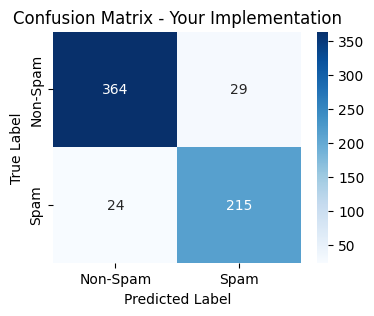

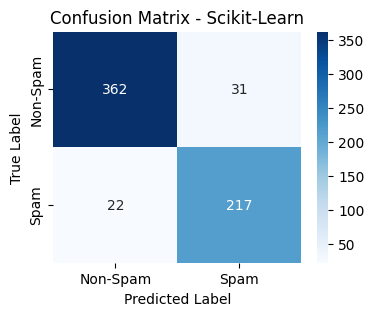

In [108]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix - Your Implementation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.figure(figsize=(4, 3))
sns.heatmap(sklearn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix - Scikit-Learn')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()